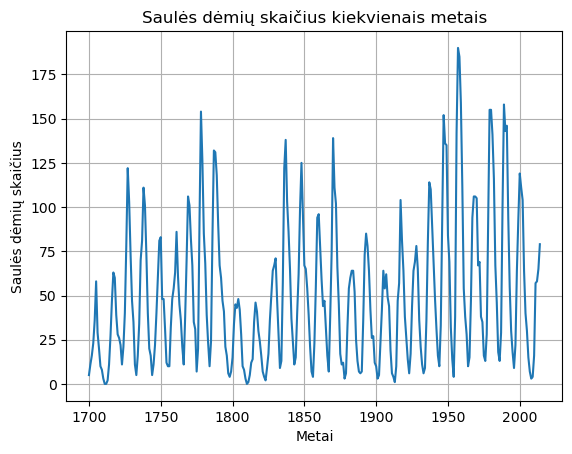

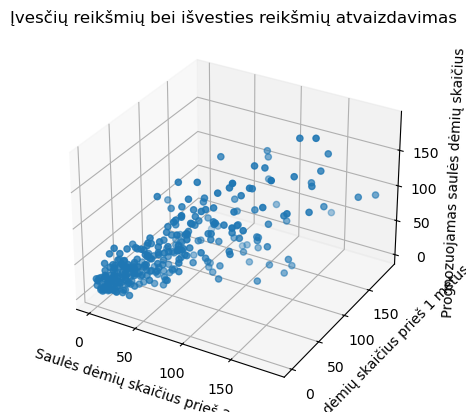

Koeficientai gauti naudojant tiesinę autoregresiją: b_0 = 8.110116522429614
b_1 = 0.011274617041678219
b_2 = 0.11401852375966581
b_3 = 0.034020085241429646
b_4 = -0.03176102135026293
b_5 = 0.0629823140410575
b_6 = -0.15371419472469292
b_7 = 0.14257870729755714
b_8 = -0.051735291322855606
b_9 = -0.5743532553515629
b_10 = 1.2682798410207627


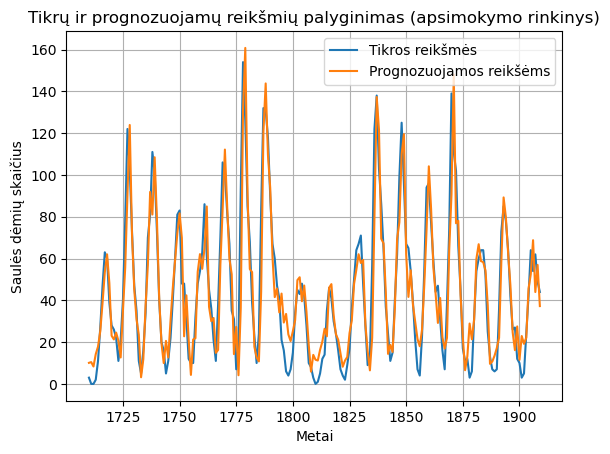

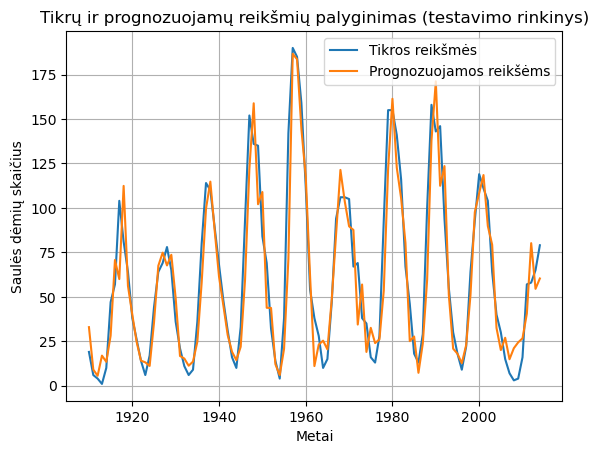

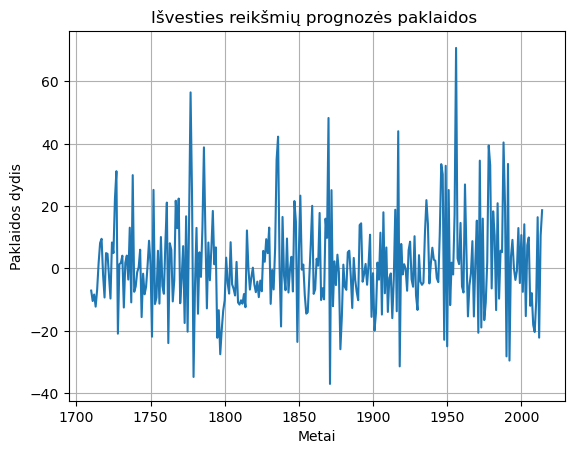

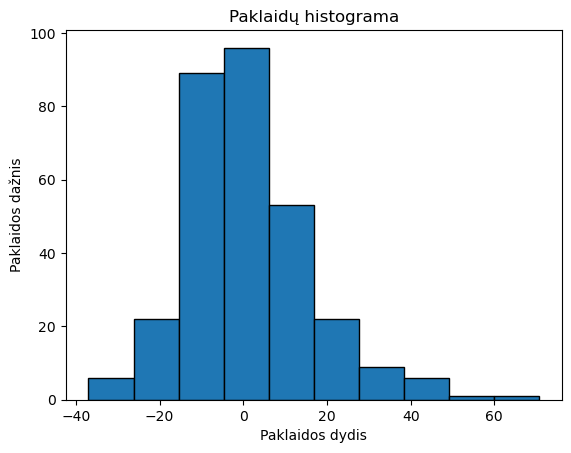

232.26342820195606
8.608355711023727


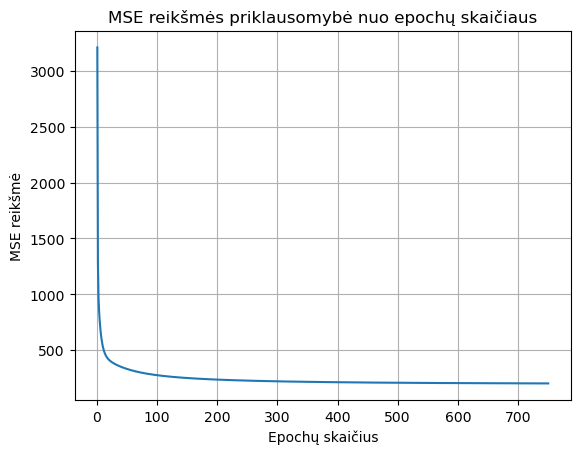

Koeficientai po apmokymo: b_0 = 0.027514095455999085
b_1 = 0.05983965982162632
b_2 = 0.10160445284741446
b_3 = 0.06231109141886056
b_4 = 0.0060770373434136035
b_5 = -0.004307315338872428
b_6 = -0.01662725462233392
b_7 = 0.11738200020699194
b_8 = -0.17944890833403873
b_9 = -0.3454250023201298
b_10 = 1.1803978462242788
234.35860817295236
8.577415975156647


In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


class InOut:
    @staticmethod
    def read_file(filename):
        f = open(filename,"r")
        arr = {"year": [], "sunspot": []}
        for line in f:
            s_line = line.split("\t")
            arr["year"].append(float(s_line[0]))
            arr["sunspot"].append(float(s_line[1].strip()))
        f.close()
        return arr


class Tasks:
    @staticmethod
    def MSE(errs):
        return np.sum([e ** 2 / len(errs) for e in errs])

    @staticmethod
    def MAD(errs):
        return np.median(np.absolute(errs))

    @staticmethod
    def prepare_data(data, n):
        return np.array([[data[j] for j in range(i, i + n)] for i in range(0, len(data) - n)]), np.array(data[n:len(data)])

    @staticmethod
    def split_data(P, T, count):
        return P[:count], T[:count], P[count:], T[count:]




class Draw:
    @staticmethod
    def plot_sunspots(year, sunspots):
        plt.plot(year, sunspots)
        plt.xlabel("Metai")
        plt.ylabel("Saulės dėmių skaičius")
        plt.title("Saulės dėmių skaičius kiekvienais metais")
        plt.grid()
        plt.show()

    @staticmethod
    def draw_sunspot_3d(x, y, z):
        fig = plt.figure()
        ax = fig.add_subplot(projection="3d")
        ax.scatter(x, y, z)
        ax.set_xlabel("Saulės dėmių skaičius prieš 2 metus")
        ax.set_ylabel("Saulės dėmių skaičius prieš 1 metus")
        ax.set_zlabel("Prognozuojamas saulės dėmių skaičius")
        ax.set_title("Įvesčių reikšmių bei išvesties reikšmių atvaizdavimas")
        plt.show()

    @staticmethod
    def plot_real_and_predicted_values(year, real, predicted, title):
        plt.plot(year, real)
        plt.plot(year, predicted)
        plt.xlabel("Metai")
        plt.ylabel("Saulės dėmių skaičius")
        plt.title(title)
        plt.grid()
        plt.legend(["Tikros reikšmės", "Prognozuojamos reikšėms"])
        plt.show()

    @staticmethod
    def plot_error_values(year, errors):
        plt.plot(year, errors)
        plt.xlabel("Metai")
        plt.ylabel("Paklaidos dydis")
        plt.title("Išvesties reikšmių prognozės paklaidos ")
        plt.grid()
        plt.show()

    @staticmethod
    def plot_error_hist(errors):
        plt.hist(errors, edgecolor="black")
        plt.xlabel("Paklaidos dydis")
        plt.ylabel("Paklaidos dažnis")
        plt.title("Paklaidų histograma")
        plt.show()

    @staticmethod
    def plot_mse(epsc, mse):
        plt.plot(range(1, epsc + 1), mse)
        plt.title("MSE reikšmės priklausomybė nuo epochų skaičiaus")
        plt.xlabel("Epochų skaičius")
        plt.ylabel("MSE reikšmė")
        plt.grid()
        plt.show()


class LinearNeuron:
    def __init__(self, lr, epsc, goal):
        self.lr = lr
        self.epsc = epsc
        self.goal = goal

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []
        for i in range(self.epsc):
            output = self.calculate_output(X)
            errs = y - output
            self.weights[1:] += self.lr * X.T.dot(errs) * 2/len(X)
            self.weights[0] += self.lr * errs.sum() * 2/len(X)
            self.costs.append(Tasks.MSE(errs))
            if self.costs[i] <= self.goal:
                break
        return self

    def auto_fit(self, X, y, min_step, inc_factor, dec_factor):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []
        counter = 0
        step = self.lr
        output = self.calculate_output(X)
        errs = y - output
        self.costs.append(Tasks.MSE(errs))
        while step > min_step and counter + 1 < self.epsc and self.costs[counter] > self.goal:
            copy = self.weights.copy()
            self.weights[1:] += step * X.T.dot(errs) * 2/len(X)
            self.weights[0] += step * errs.sum() * 2/len(X)
            output = self.calculate_output(X)
            errs = y - output
            mse = Tasks.MSE(errs)
            if mse < self.costs[counter]:
                step *= inc_factor
                self.costs.append(mse)
                counter += 1
            else:
                step /= dec_factor
                self.weights = copy
        return self



    def calculate_output(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return self.calculate_output(X)







FILENAME = "sunspot.txt"
ITER = 750
N = 10
TEST = 200

info = InOut.read_file(FILENAME)

Draw.plot_sunspots(info["year"], info["sunspot"])

P, T = Tasks.prepare_data(info["sunspot"], N)

Px = list(map(lambda x: x[0], P))
Py = list(map(lambda x: x[1], P))
Draw.draw_sunspot_3d(Px,Py,T)

Pu, Tu, Pt, Tt = Tasks.split_data(P,T,TEST)

model = LinearRegression().fit(Pu, Tu)

print("Koeficientai gauti naudojant tiesinę autoregresiją: b_0 = {0}".format(model.intercept_))
for i in range(len(model.coef_)):
    print(f"b_{i + 1} = {model.coef_[i]}")


Tsur = model.predict(Pu)
Draw.plot_real_and_predicted_values(info["year"][N:TEST+N],Tu,Tsur,"Tikrų ir prognozuojamų reikšmių palyginimas (apsimokymo rinkinys)")

Tstr = model.predict(Pt)
Draw.plot_real_and_predicted_values(info["year"][TEST+N:],Tt,Tstr,"Tikrų ir prognozuojamų reikšmių palyginimas (testavimo rinkinys)")

err1 = np.subtract(Tu,Tsur)
err2 = np.subtract(Tt, Tstr)
errs1 = np.append(err1, err2)
Draw.plot_error_values(info["year"][N:],errs1)
Draw.plot_error_hist(errs1)
print(Tasks.MSE(errs1))
print(Tasks.MAD(errs1))

L = LinearNeuron(0.000015,ITER,200)
L = L.fit(Pu,Tu)
Draw.plot_mse(ITER,L.costs)
print("Koeficientai po apmokymo: b_0 = {0}".format(L.weights[0]))
for i in range(1, len(L.weights)):
    print(f"b_{i} = {L.weights[i]}")

Tsun = L.predict(Pu)
Tstn = L.predict(Pt)
err3 = np.subtract(Tu,Tsun)
err4 = np.subtract(Tt,Tstn)
errs2 = np.append(err3, err4)
print(Tasks.MSE(errs2))
print(Tasks.MAD(errs2))






